In [8]:
from __future__ import print_function

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2


import flotilla
study = flotilla.embark('singlecell_pnm_figure4_voyages', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-11-07 09:19:44	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-11-07 09:19:44	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-11-07 09:20:12 	Initializing Study
2016-11-07 09:20:12 	Initializing Predictor configuration manager for Study
2016-11-07 09:20:12	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-11-07 09:20:12	Added ExtraTreesClassifier to default predictors
2016-11-07 09:20:12	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-11-07 09:20:12	Added ExtraTreesRegressor to default predictors
2016-11-07 09:20:12	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-11-07 09:20:12	Added GradientBoostingClassifier to defa

Error loading species hg19 data: HTTP Error 404: Not Found

In [9]:
folder = 'figures'

In [ ]:
figure_folder = 'figures/study.supplemental.splicing_expression_corr_with_permuted'
! mkdir -p $figure_folder

## Pearson correlation of splicing to gene expression

In [31]:
%time splicing_expression_corr = splicing_to_correlate.apply(lambda x: motor_neurons_expression.apply(lambda y: y.corr(x)))
print(splicing_expression_corr.shape)
splicing_expression_corr.head()

CPU times: user 35.8 s, sys: 34 ms, total: 35.9 s
Wall time: 35.8 s
(17458, 3)


,PKM,SMARCE1,SNAP25
ENSG00000000003,0.050616,0.124370,0.002211
ENSG00000000419,-0.121469,0.057348,-0.146447
ENSG00000000457,0.057363,0.218197,0.000456
ENSG00000000460,0.047255,0.082262,-0.161476
ENSG00000001036,-0.320053,0.406202,0.182685


In [32]:
sns.set(style='white', context='paper')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


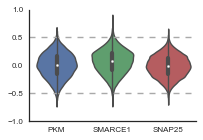

In [33]:
fig, ax = plt.subplots(figsize=(3, 2))
sns.violinplot(splicing_expression_corr)
xmin, xmax = ax.get_xlim()
ax.hlines([-0.5,  0.5], xmin, xmax, linestyle='--', color='darkgrey')
sns.despine()
fig.savefig('{}/expression_correlation_to_bimodal_splicing_violinplots_pearson.pdf'.format(figure_folder))

In [34]:
column_renamer = {'level_0': 'Splicing Gene', 0:'Pearson R'}

In [35]:
# column_renamer = dict(level_0='Spliced Gene', level_0='Expression Gene')

splicing_expression_corr_tidy = splicing_expression_corr.unstack().reset_index()
splicing_expression_corr_tidy = splicing_expression_corr_tidy.rename(columns=column_renamer)
splicing_expression_corr_tidy['dataset'] = 'Actual'
splicing_expression_corr_tidy.head()

,Splicing Gene,level_1,Pearson R,dataset
0,PKM,ENSG00000000003,0.050616,Actual
1,PKM,ENSG00000000419,-0.121469,Actual
2,PKM,ENSG00000000457,0.057363,Actual
3,PKM,ENSG00000000460,0.047255,Actual
4,PKM,ENSG00000001036,-0.320053,Actual


In [36]:
study.supplemental.splicing_expression_corr = splicing_expression_corr_tidy

In [37]:
study.save('singlecell_pnm_figure6_splicing_correlation', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects//singlecell_pnm_figure6_splicing_correlation/datapackage.json


In [38]:
number_of_events_detected = study.splicing.data.notnull().sum(axis=1)
number_of_events_detected.name = 'Number of AS exons detected'

In [39]:
number_of_genes_detected = (study.expression.data > 1).sum(axis=1)
number_of_genes_detected.name = 'Number of genes with TPM > 1'

In [40]:
detection = study.metadata.data.join(study.mapping_stats.data, how='outer')
print(detection.shape)
detection = detection.join(number_of_events_detected, how='outer')
print(detection.shape)
detection = detection.join(number_of_genes_detected, how='outer')
print(detection.shape)
detection.head()

(214, 45)
(214, 46)
(214, 47)


,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier,...,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,% splices: Annotated (sjdb),% splices: GT/AG,% splices: GC/AG,% splices: AT/AC,% splices: Non-canonical,Number of AS exons detected,Number of genes with TPM > 1
CVN_01,True,False,NPC,False,True,False,True,NaN,NaN,False,...,0.0,3.10,0.02,98.841858,99.126387,0.652647,0.134704,0.086261,4705.0,6499
CVN_02,True,False,NPC,False,True,False,True,NaN,NaN,False,...,0.0,3.96,0.02,98.614629,99.020137,0.801086,0.097722,0.081054,3672.0,6780
CVN_03,True,False,NPC,False,True,False,True,NaN,NaN,False,...,0.0,4.99,0.02,98.596403,99.028733,0.796140,0.101854,0.073272,3022.0,5234
CVN_04,True,False,NPC,False,True,False,True,NaN,NaN,False,...,0.0,2.89,0.02,98.831275,99.120483,0.711286,0.084708,0.083523,4724.0,7659
CVN_05,True,False,NPC,False,True,False,True,NaN,NaN,False,...,0.0,2.49,0.02,98.605923,99.083942,0.761804,0.089186,0.065069,5090.0,8278


In [41]:
detection.query('phenotype=="NPC" & pooled')

,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier,...,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,% splices: Annotated (sjdb),% splices: GT/AG,% splices: GC/AG,% splices: AT/AC,% splices: Non-canonical,Number of AS exons detected,Number of genes with TPM > 1
CVN_17,False,True,NPC,False,True,False,True,NaN,NaN,False,...,0.0,2.71,0.02,99.092466,99.203314,0.643057,0.099546,0.054083,10365.0,12443
CVN_35,False,True,NPC,False,True,False,True,NaN,NaN,False,...,0.0,2.51,0.02,99.142378,99.223608,0.624636,0.089791,0.061965,11194.0,11995
N4_05,False,True,NPC,False,True,False,False,NaN,NaN,False,...,0.0,15.62,0.01,99.151073,99.219046,0.609139,0.103243,0.068572,10025.0,10771


In [42]:
%pdb

Automatic pdb calling has been turned ON


In [43]:
sns.set(context='paper', style='whitegrid')

In [44]:
detection['Uniquely mapped reads (millions)'] = detection['Uniquely mapped reads number']/1e6

In [45]:
import matplotlib as mpl

In [46]:
mpl.__version__

'1.5.1'

In [52]:
highlight = 'pooled'

In [55]:
detection.query('pooled')

,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier,...,% of reads unmapped: too short,% of reads unmapped: other,% splices: Annotated (sjdb),% splices: GT/AG,% splices: GC/AG,% splices: AT/AC,% splices: Non-canonical,Number of AS exons detected,Number of genes with TPM > 1,Uniquely mapped reads (millions)
CVN_17,False,True,NPC,False,True,False,True,NaN,NaN,False,...,2.71,0.02,99.092466,99.203314,0.643057,0.099546,0.054083,10365.0,12443,16.082888
CVN_35,False,True,NPC,False,True,False,True,NaN,NaN,False,...,2.51,0.02,99.142378,99.223608,0.624636,0.089791,0.061965,11194.0,11995,20.050395
M2_05,False,True,MN,True,False,False,True,batch1,NaN,False,...,7.51,0.01,98.988162,99.197568,0.609594,0.117349,0.075489,10010.0,11753,10.546951
M2nd_13,False,True,MN,True,False,False,True,batch2,NaN,False,...,11.90,0.01,98.612830,99.116606,0.656137,0.131935,0.095322,9418.0,11415,51.058876
M2nd_21,False,True,MN,True,False,False,True,batch2,NaN,False,...,12.35,0.01,98.613613,99.116186,0.657210,0.132694,0.093910,9418.0,11337,49.886442
M2nd_33,False,True,iPSC,False,True,False,True,batch2,NaN,False,...,12.35,0.01,98.653825,99.249515,0.632902,0.071975,0.045608,6229.0,13676,7.243846
M2nd_34,False,True,iPSC,False,True,False,True,batch2,NaN,False,...,10.71,0.01,98.630297,99.233657,0.633312,0.083853,0.049178,10796.0,13802,15.122492
N4_05,False,True,NPC,False,True,False,False,NaN,NaN,False,...,15.62,0.01,99.151073,99.219046,0.609139,0.103243,0.068572,10025.0,10771,7.926793


In [66]:

def outline(x, y, highlight, data=None,
            *args, **kwargs):
#     print(args, kwargs)
#     data = kwargs.pop('data')
#     print(data.shape, kwargs['label'])
#     raise ValueError
    if data.empty:
        return
    
    rows = detection[highlight]
    subset = data.loc[rows]
    plt.scatter(subset[x], subset[y], **kwargs)

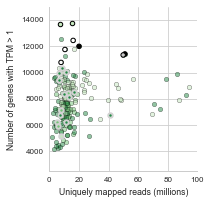

In [73]:
x, y = 'Uniquely mapped reads (millions)', number_of_genes_detected.name

g = sns.FacetGrid(detection, hue='phenotype', palette=study.phenotype_to_color, dropna=False)
g.map(plt.scatter, x, y, linewidth=0.5, edgecolor='k', alpha=0.5)
g.map_dataframe(outline, x, y, highlight='pooled', 
                linewidth=1, edgecolor='k')
g.map_dataframe(outline, x, y, highlight='outlier', 
                linewidth=2, edgecolor='lightgrey')
# for ax in g.axes.flat:
#     ax.locator_params(nbins=6)
g.set(xlim=(0, 100), ylim=(2500, 15000))
fig.savefig('{}/mapped_reads_vs_detected_genes.pdf'.format(folder))

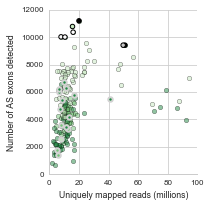

In [74]:
x, y = 'Uniquely mapped reads (millions)', number_of_events_detected.name

g = sns.FacetGrid(detection, hue='phenotype', palette=study.phenotype_to_color, dropna=False)
g.map(plt.scatter, x, y, linewidth=0.5, edgecolor='k', alpha=0.5)
g.map_dataframe(outline, x, y, highlight='pooled', 
                linewidth=1, edgecolor='k')
g.map_dataframe(outline, x, y, highlight='outlier', 
                linewidth=2, edgecolor='lightgrey')
g.set(xlim=(0, 100))
fig.savefig('{}/mapped_reads_vs_detected_events.pdf'.format(folder))

In [72]:
sns.regplot?